In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/output.csv')
print(data.head()) 

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [3]:
summary_statistics = data.describe()
target_distribution = data['prognosis'].value_counts()
summary_statistics, target_distribution

(           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
 count  4920.000000  4920.000000           4920.000000          4920.000000   
 mean      0.137805     0.159756              0.021951             0.045122   
 std       0.344730     0.366417              0.146539             0.207593   
 min       0.000000     0.000000              0.000000             0.000000   
 25%       0.000000     0.000000              0.000000             0.000000   
 50%       0.000000     0.000000              0.000000             0.000000   
 75%       0.000000     0.000000              0.000000             0.000000   
 max       1.000000     1.000000              1.000000             1.000000   
 
          shivering       chills   joint_pain  stomach_pain      acidity  \
 count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
 mean      0.021951     0.162195     0.139024      0.045122     0.045122   
 std       0.146539     0.368667     0.346007      0.207593

In [22]:
sum_by_prognosis = data.groupby('prognosis').sum()
average_by_prognosis = data.groupby('prognosis').mean()

print(sum_by_prognosis)
print(average_by_prognosis)

                                         itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo        0          0   
AIDS                                           0          0   
Acne                                           0        114   
Alcoholic hepatitis                            0          0   
Allergy                                        0          0   
Arthritis                                      0          0   
Bronchial Asthma                               0          0   
Cervical spondylosis                           0          0   
Chicken pox                                  114        114   
Chronic cholestasis                          114          0   
Common Cold                                    0          0   
Dengue                                         0        114   
Diabetes                                       0          0   
Dimorphic hemmorhoids(piles)                   0       

In [26]:
# Removing 'severity_score' from the top symptoms list if it appears
sum_by_prognosis_filtered = sum_by_prognosis.drop(columns=['severity_score'])

# Recalculate the top 5 symptoms for each prognosis without 'severity_score'
top_symptoms_by_prognosis_filtered = sum_by_prognosis_filtered.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

# Convert the result to a DataFrame for easier viewing
top_symptoms_df_filtered = pd.DataFrame(top_symptoms_by_prognosis_filtered, columns=['Top 5 Symptoms'])

# Display the full list without truncating
pd.set_option('display.max_colwidth', None)
print(top_symptoms_df_filtered)


                                                                                                                             Top 5 Symptoms
prognosis                                                                                                                                  
(vertigo) Paroymsal  Positional Vertigo                                         [vomiting, headache, nausea, loss_of_balance, unsteadiness]
AIDS                                                       [high_fever, muscle_wasting, patches_in_throat, extra_marital_contacts, itching]
Acne                                                                         [skin_rash, pus_filled_pimples, blackheads, scurring, itching]
Alcoholic hepatitis                                  [vomiting, yellowish_skin, abdominal_pain, swelling_of_stomach, distention_of_abdomen]
Allergy                                                               [continuous_sneezing, shivering, chills, watering_from_eyes, itching]
Arthritis           

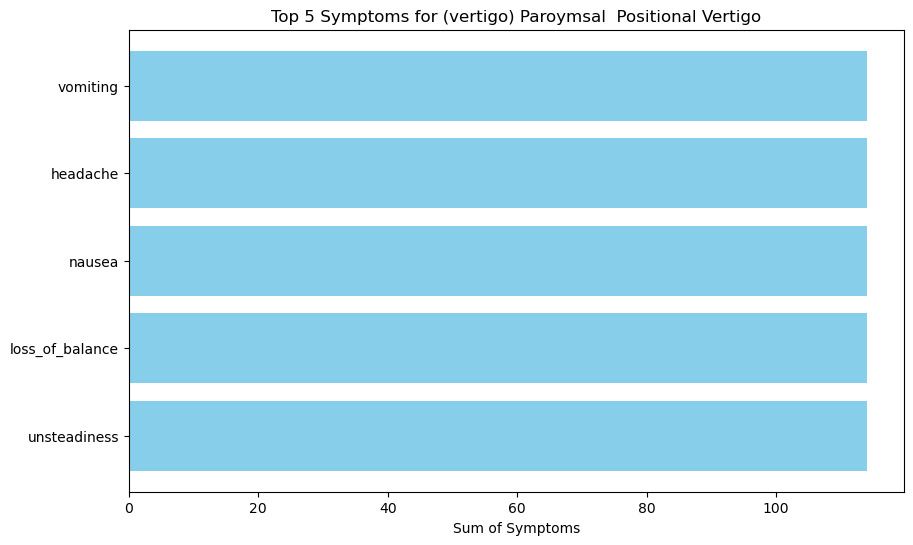

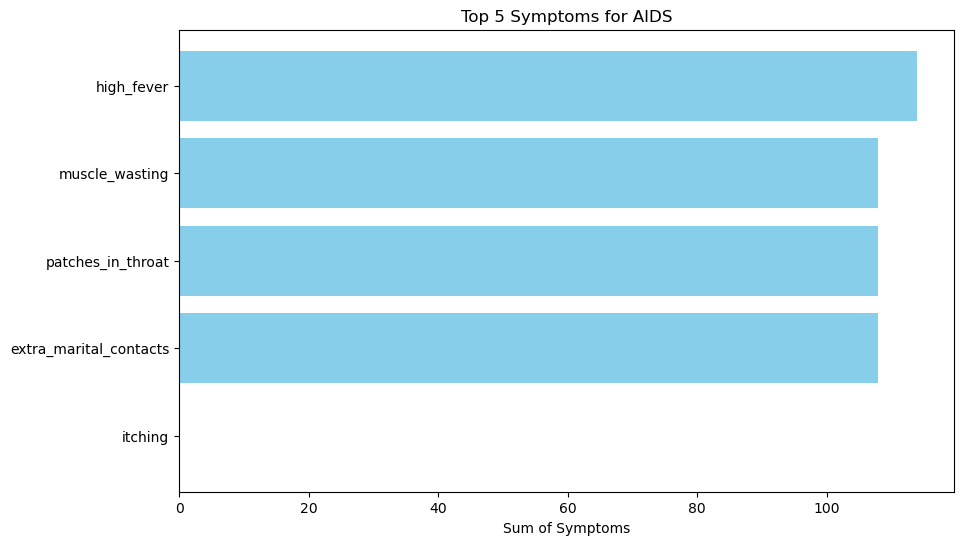

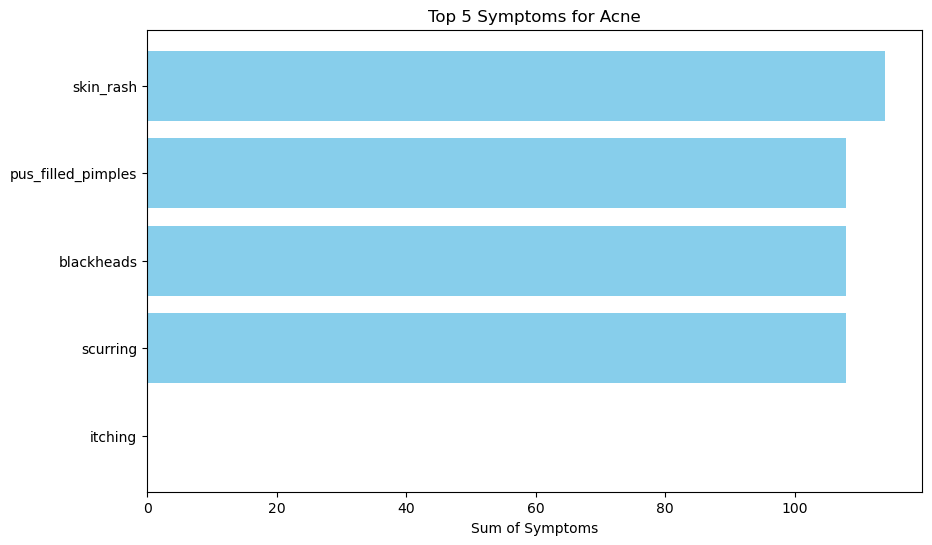

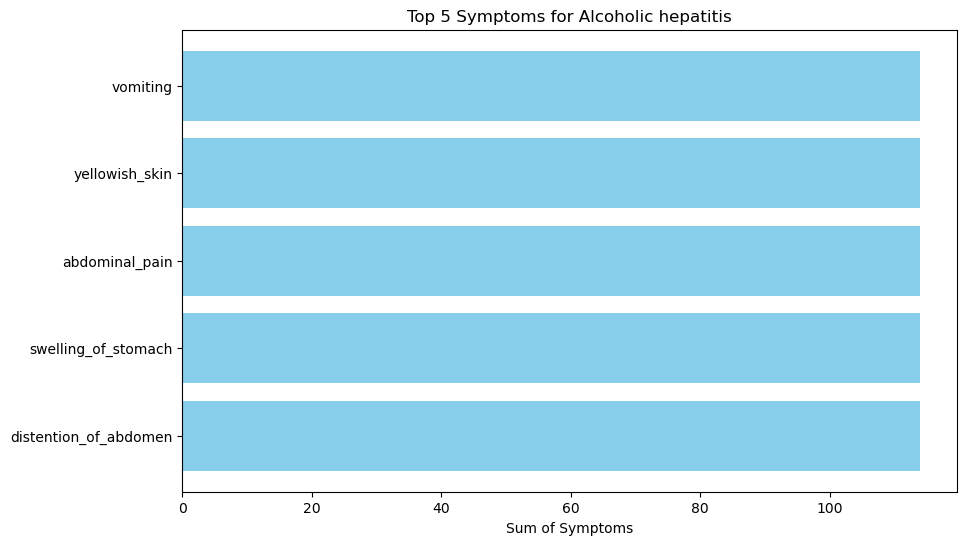

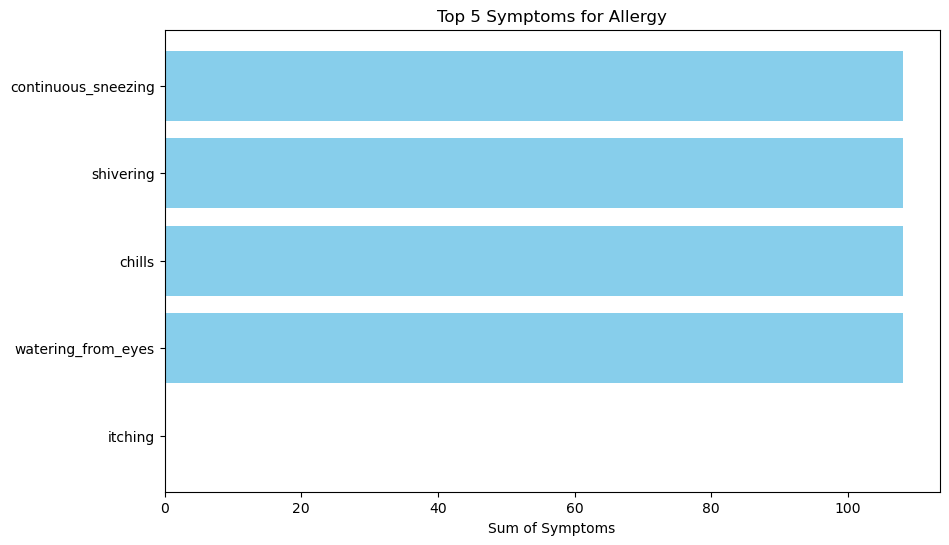

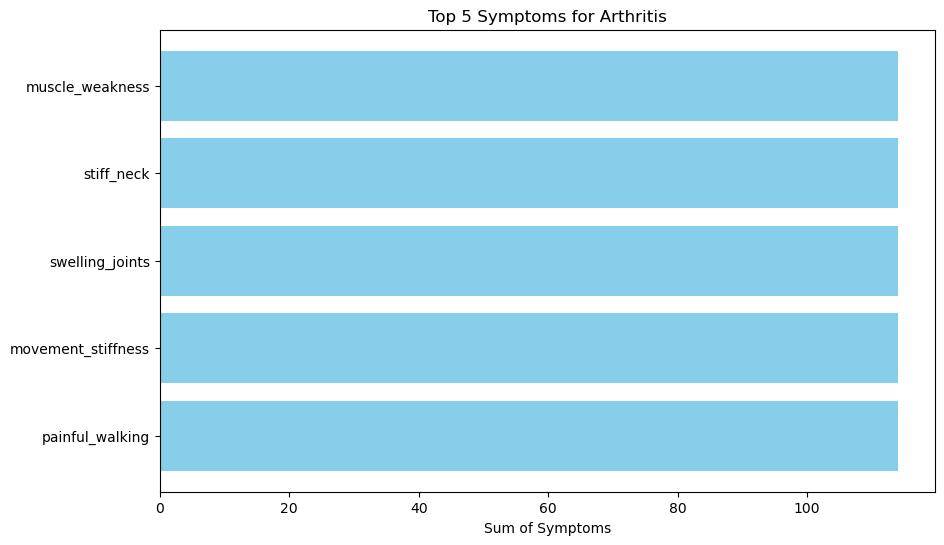

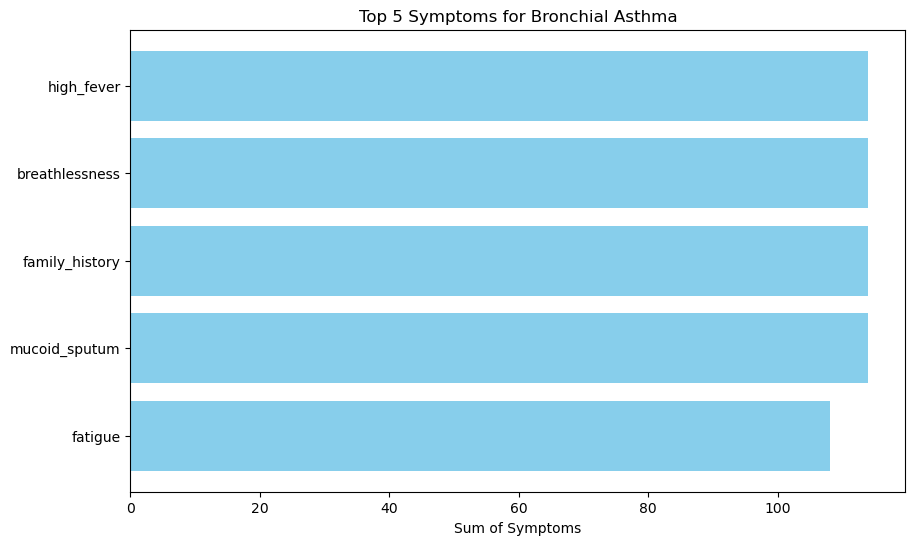

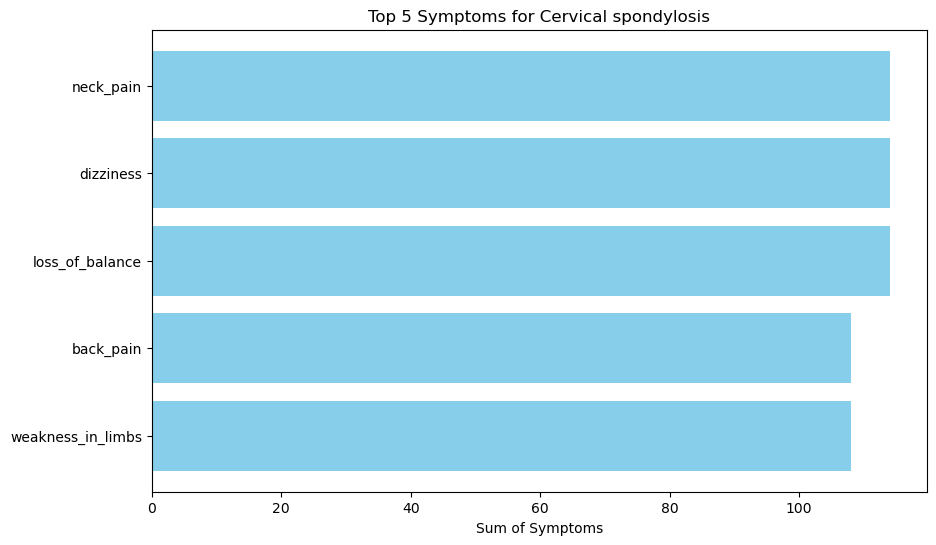

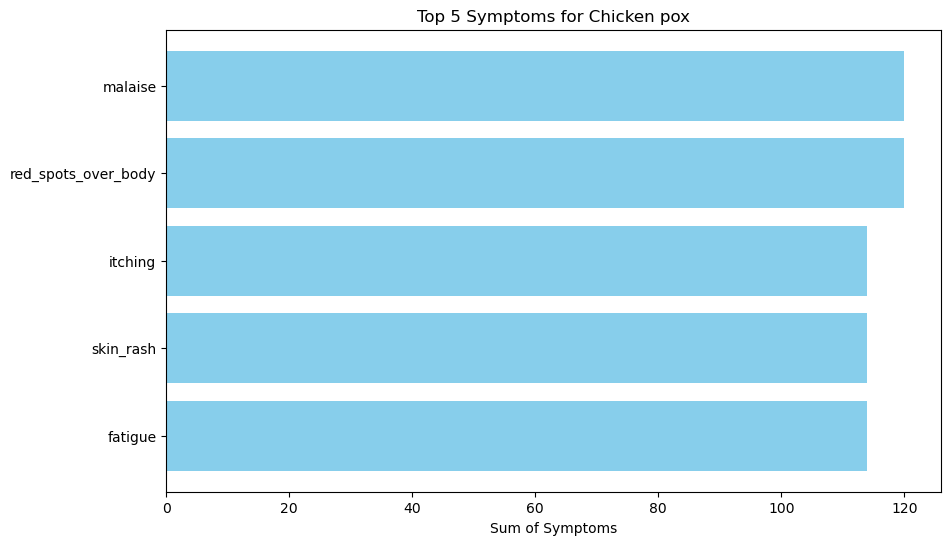

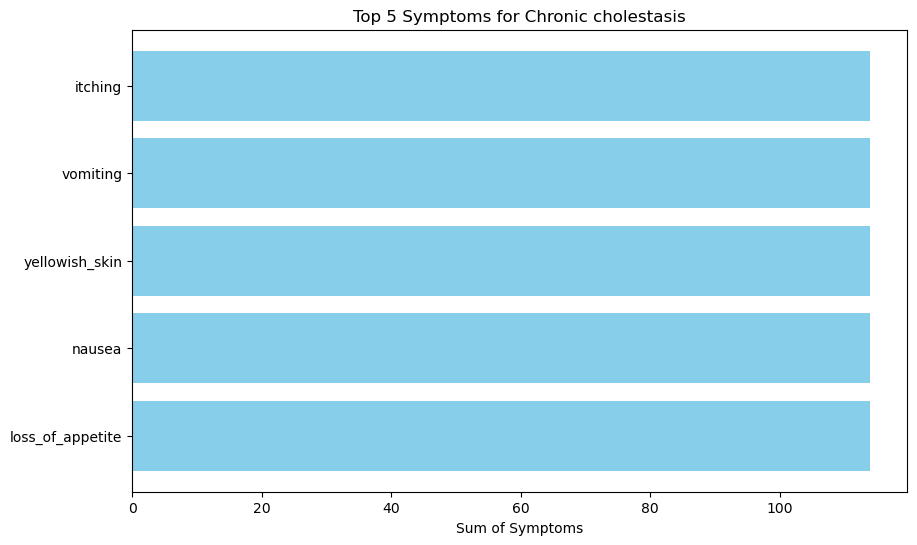

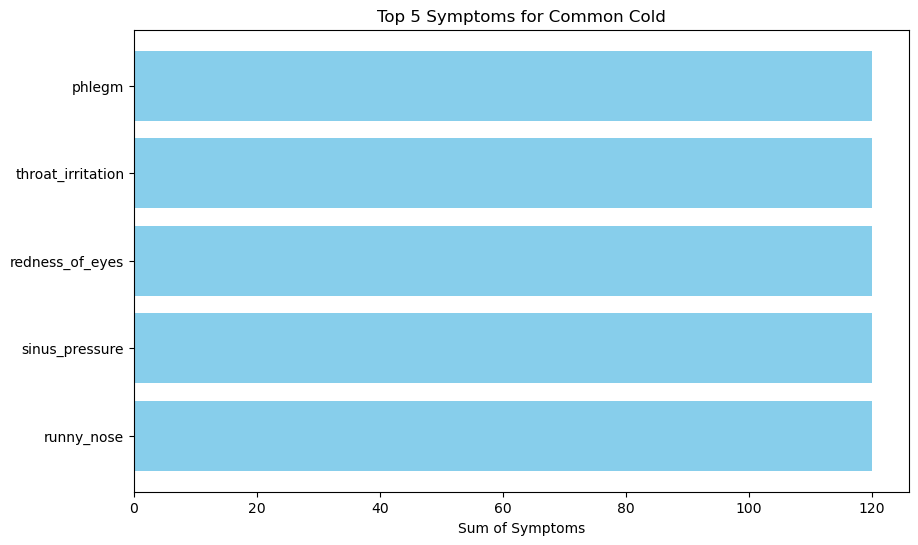

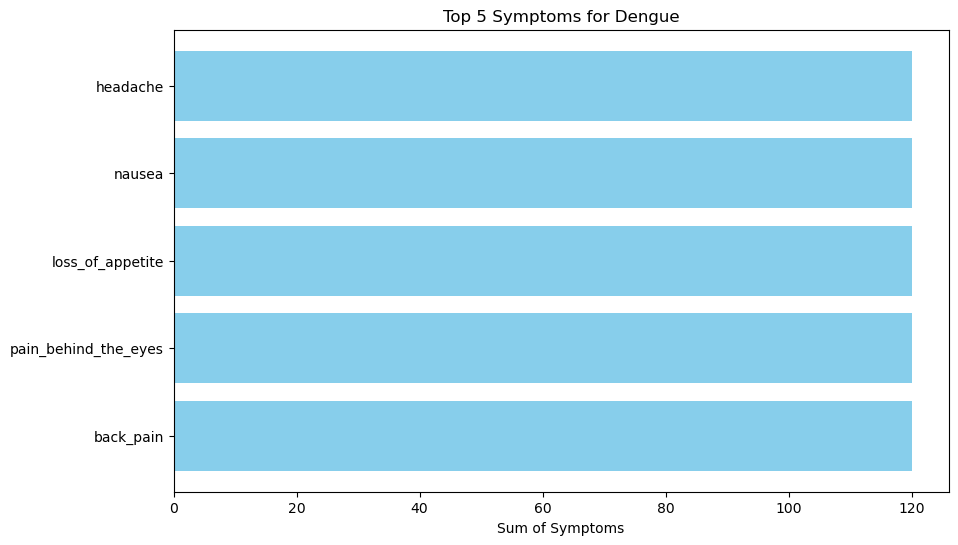

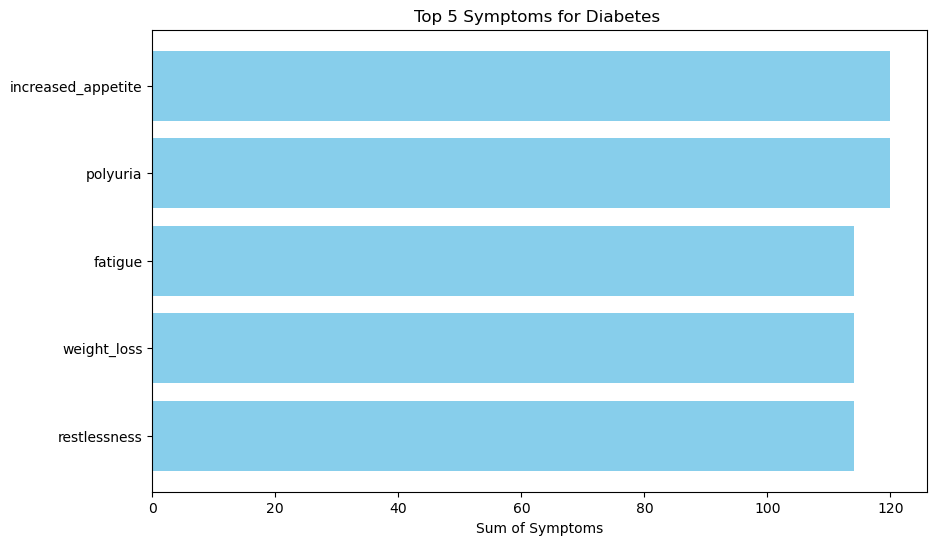

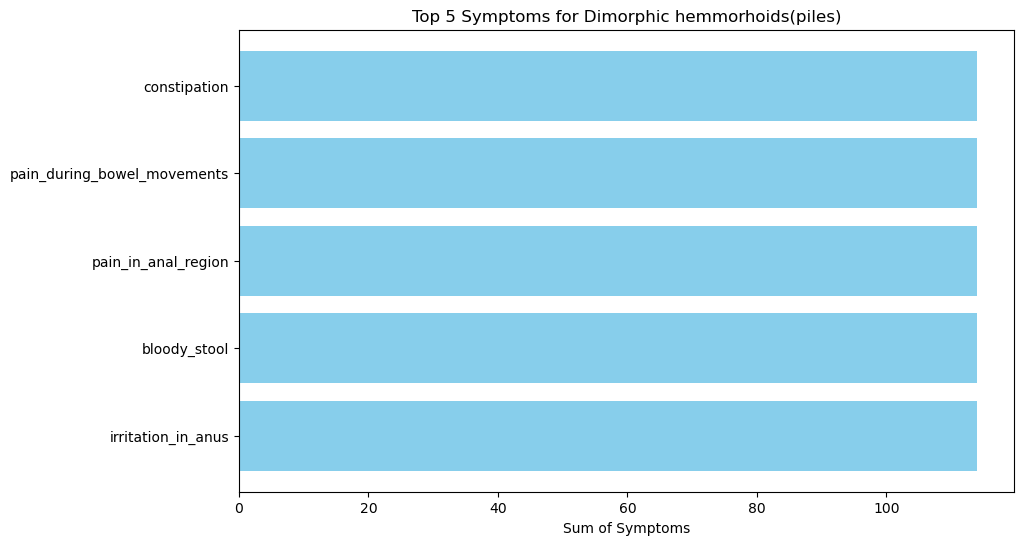

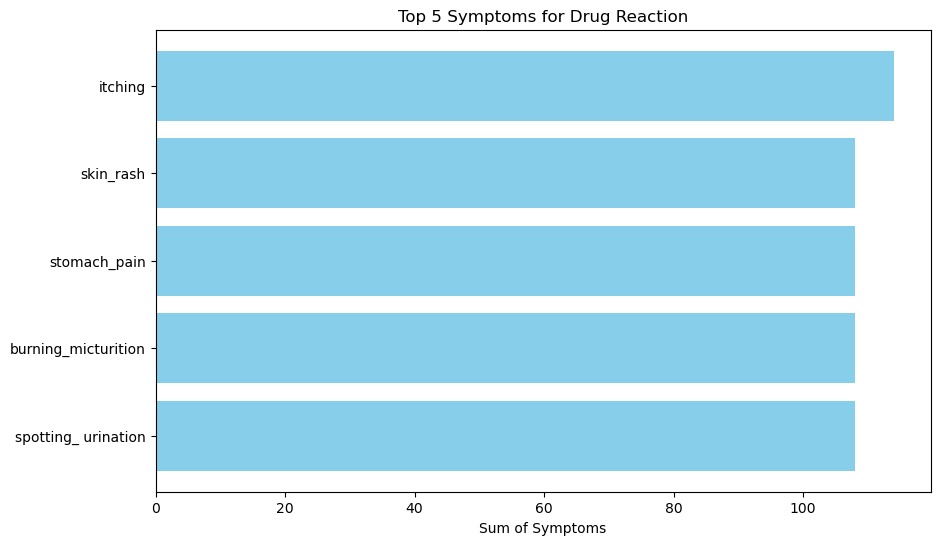

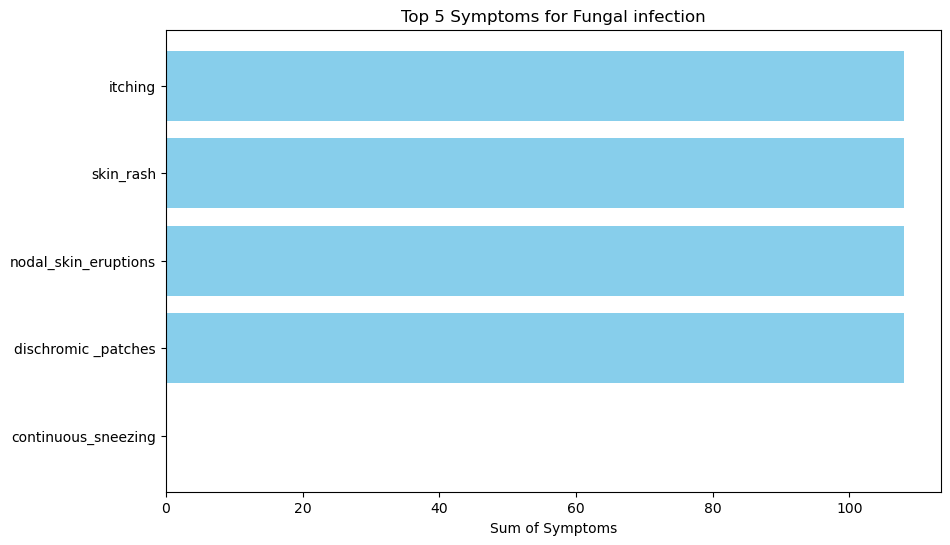

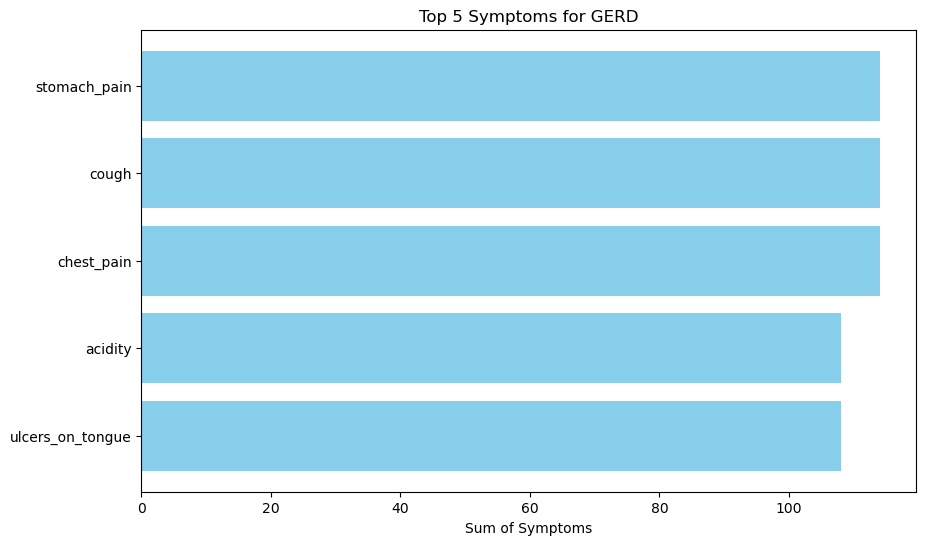

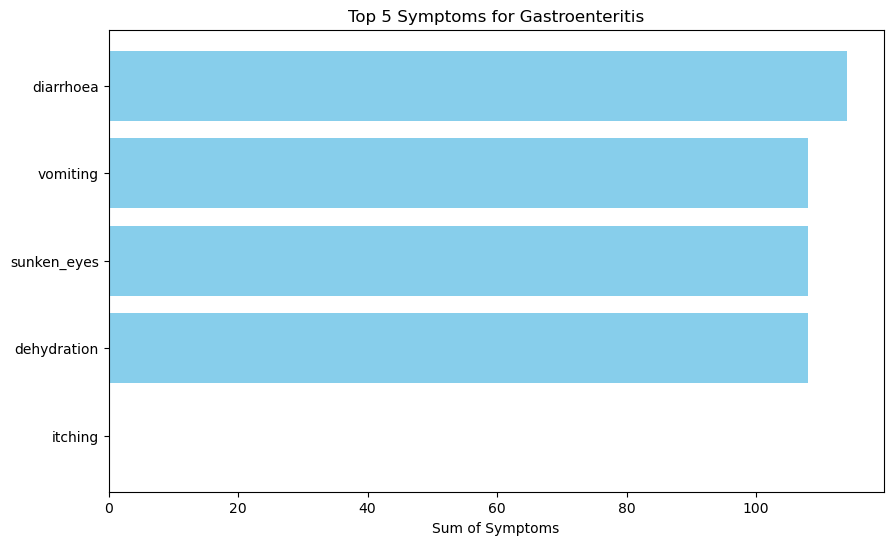

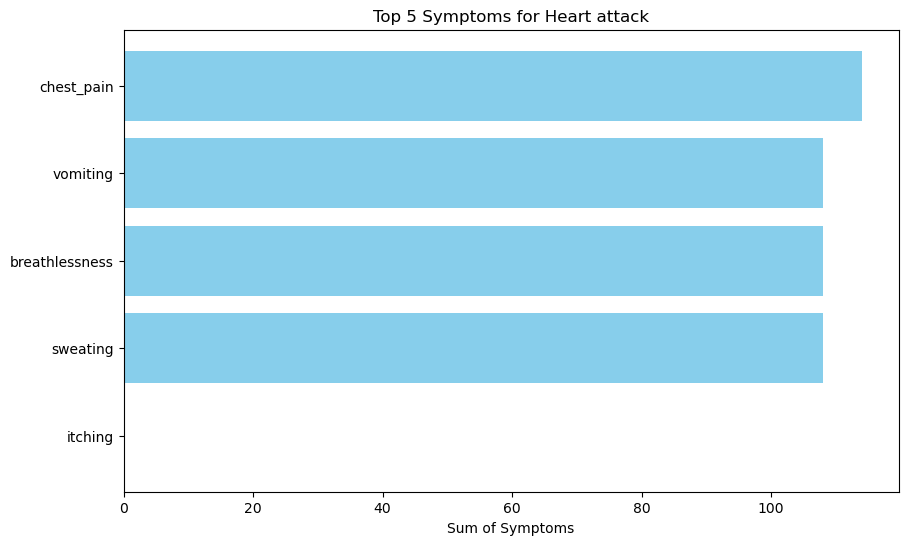

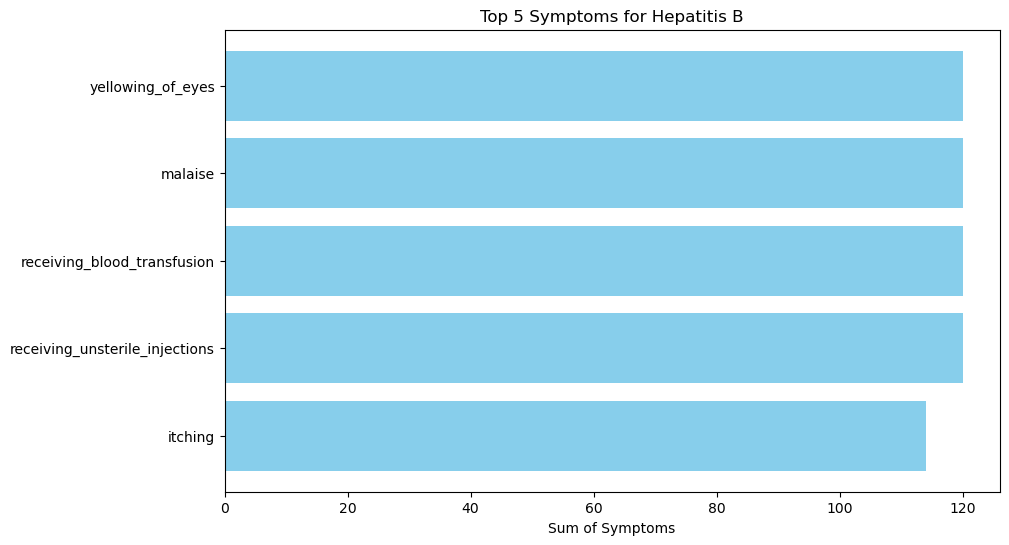

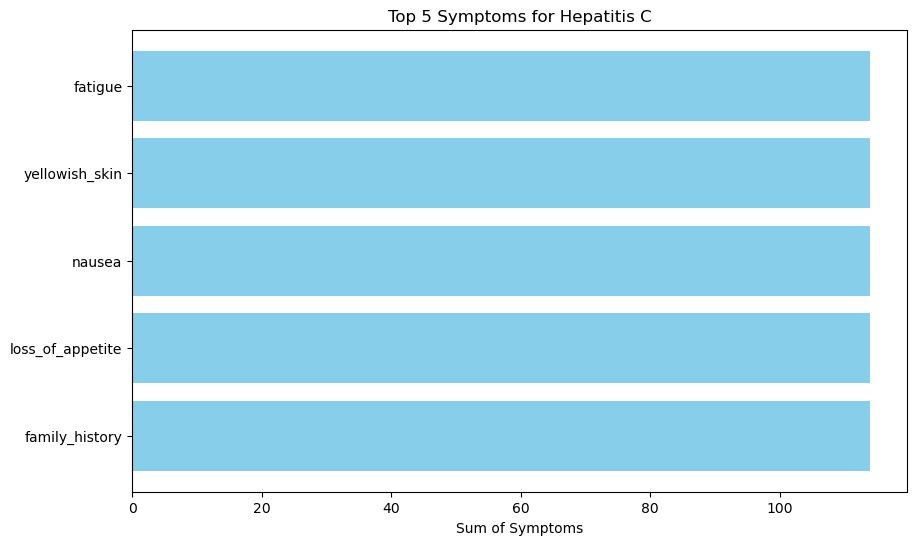

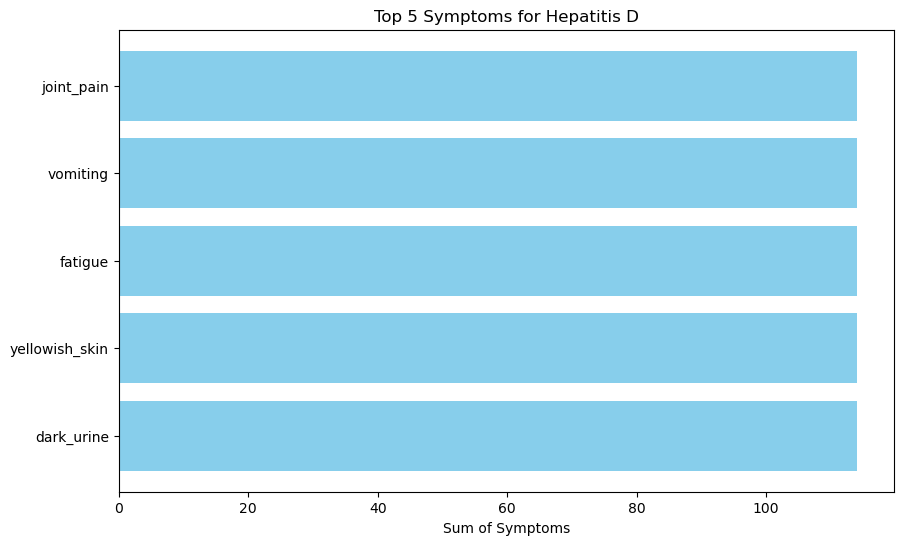

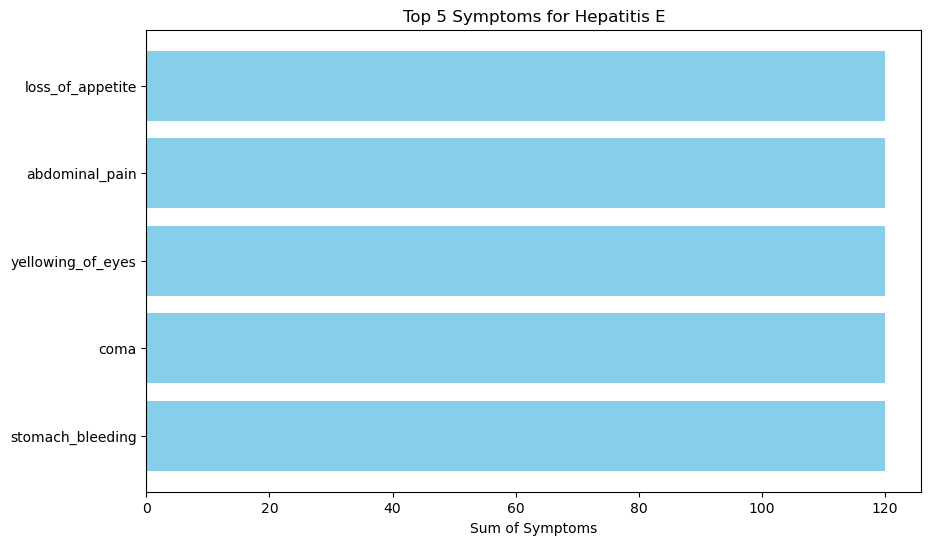

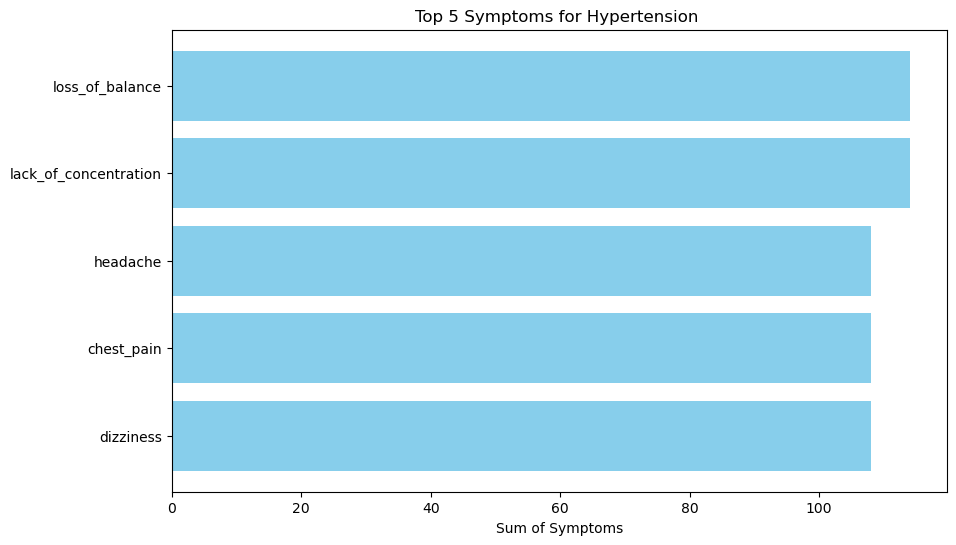

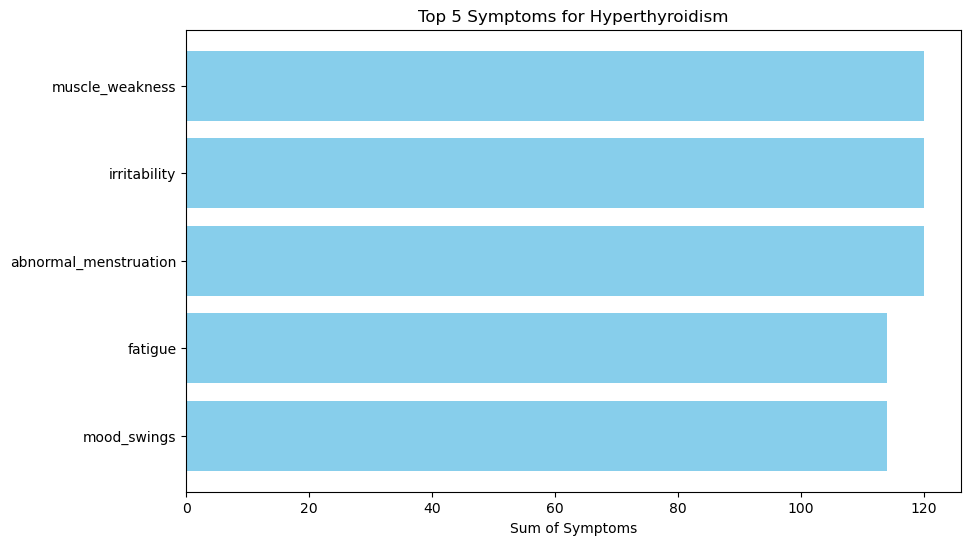

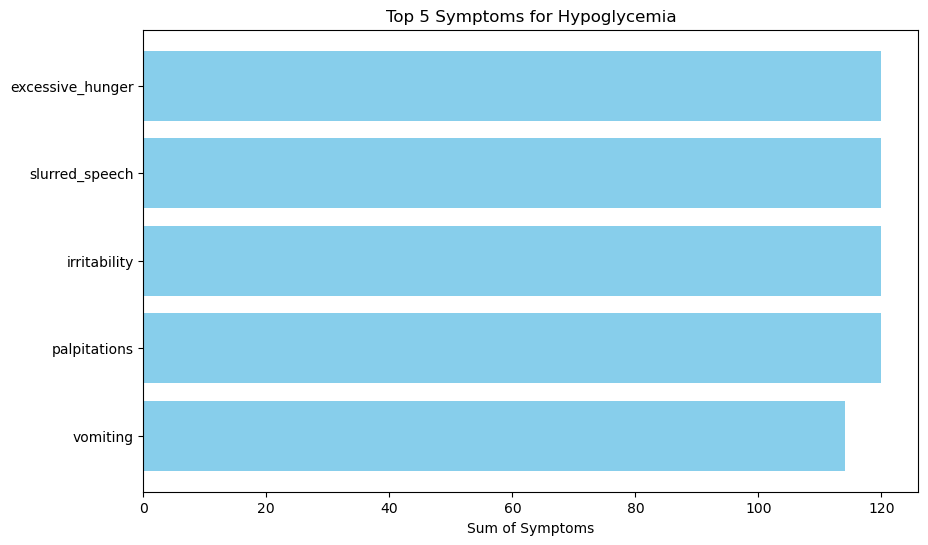

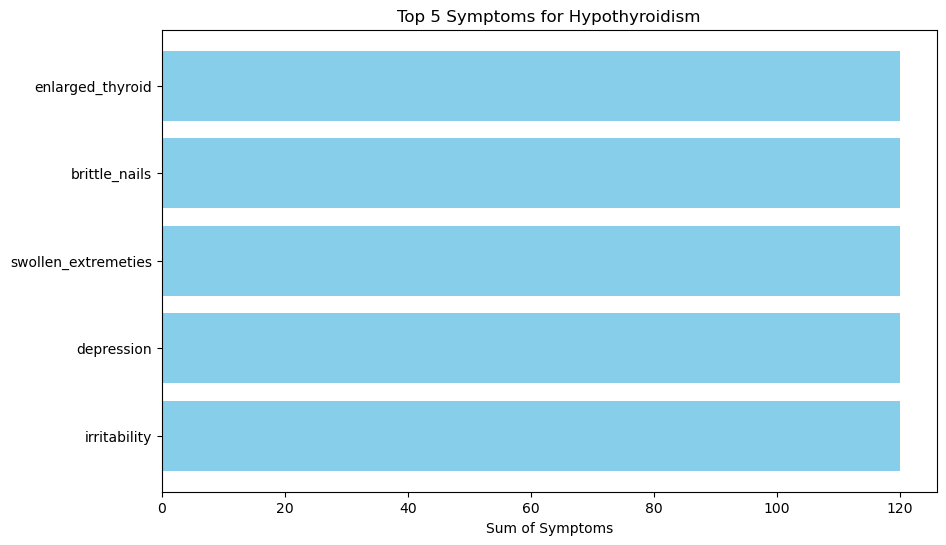

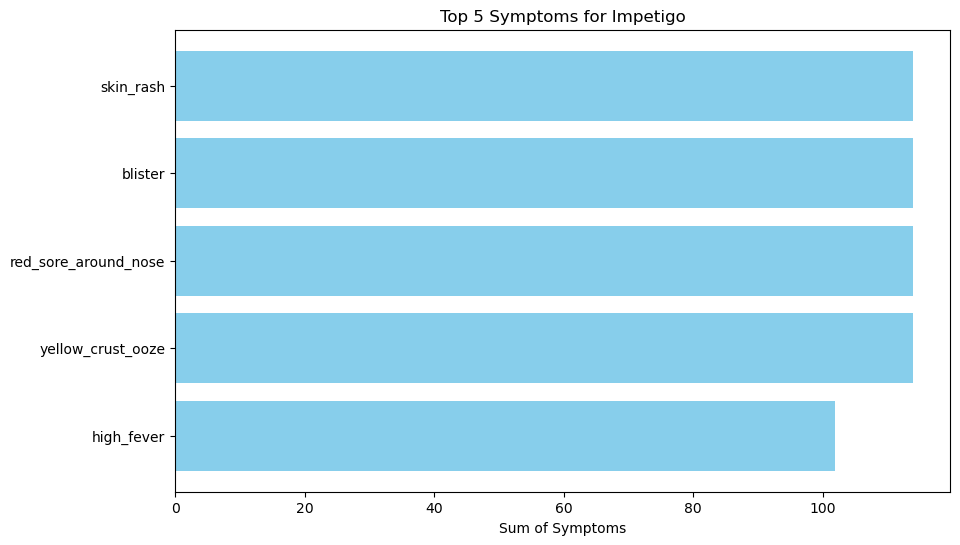

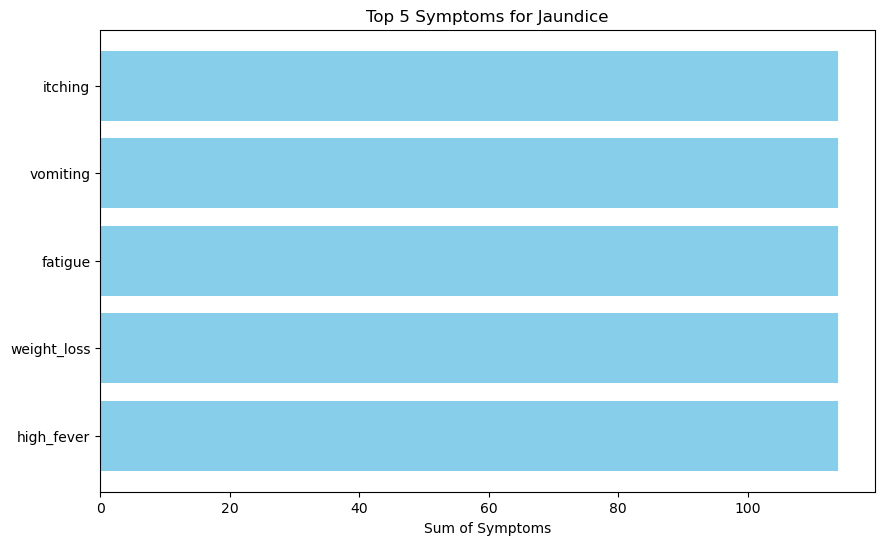

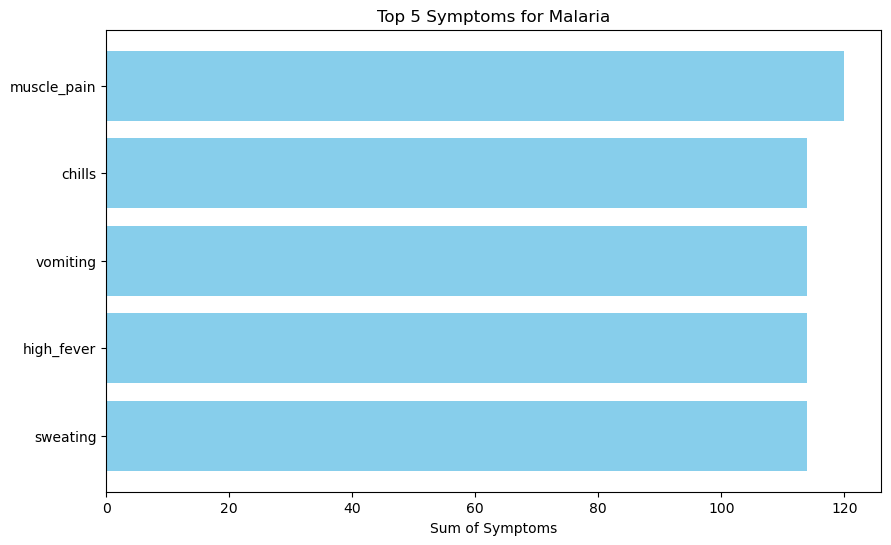

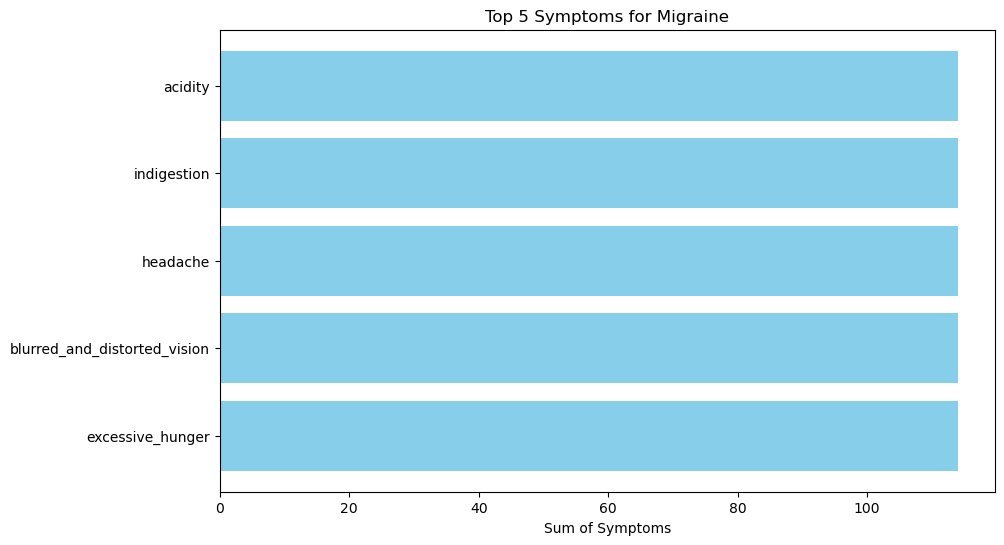

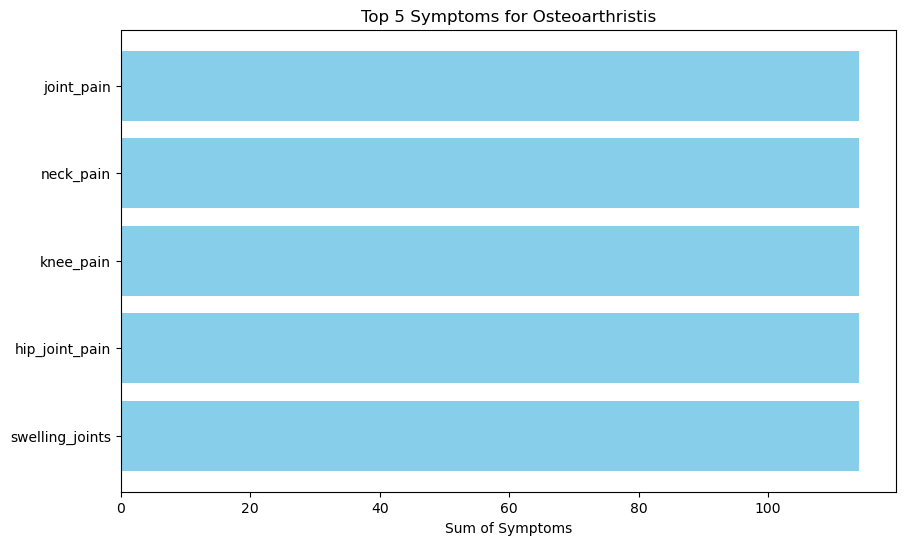

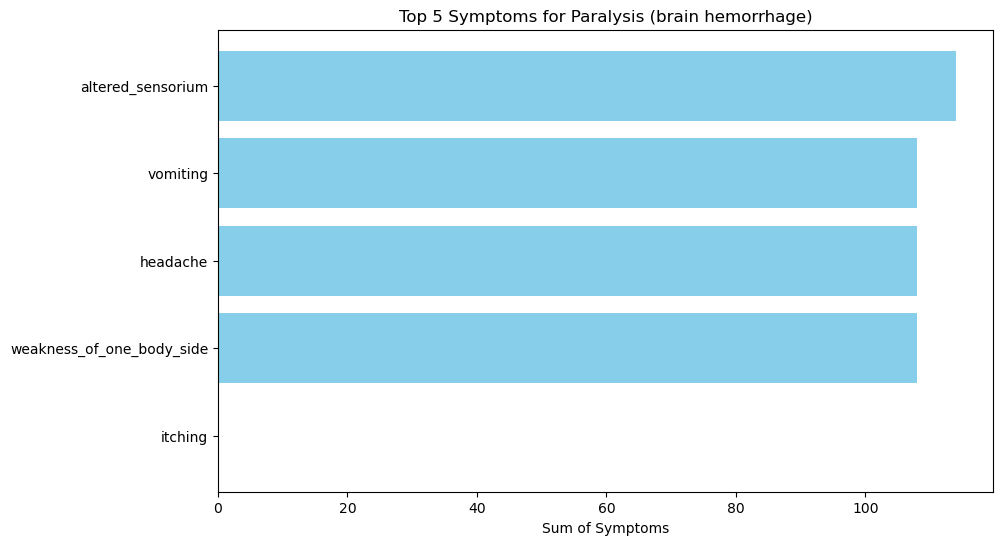

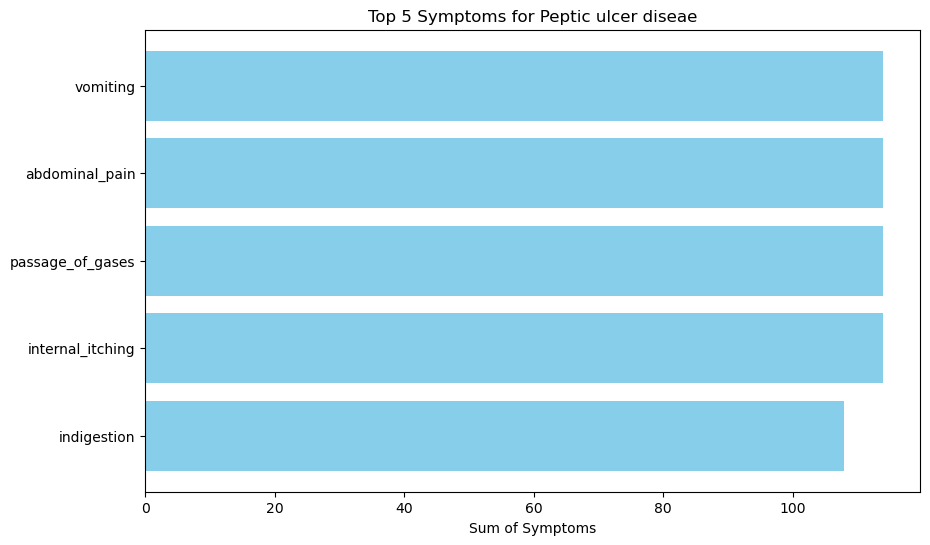

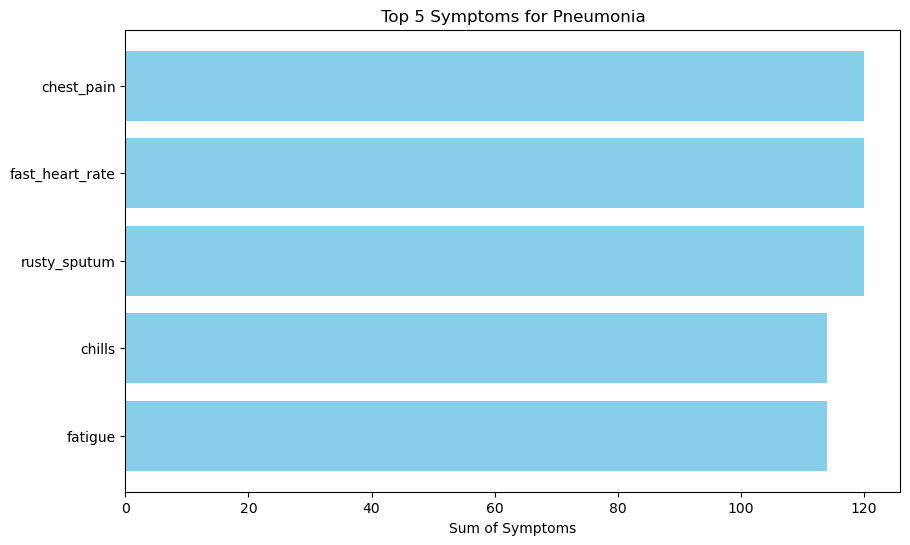

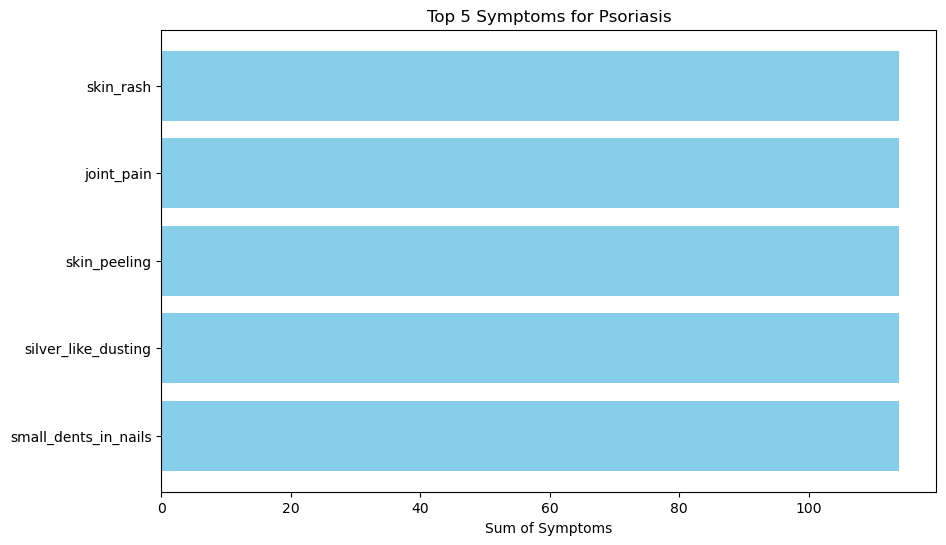

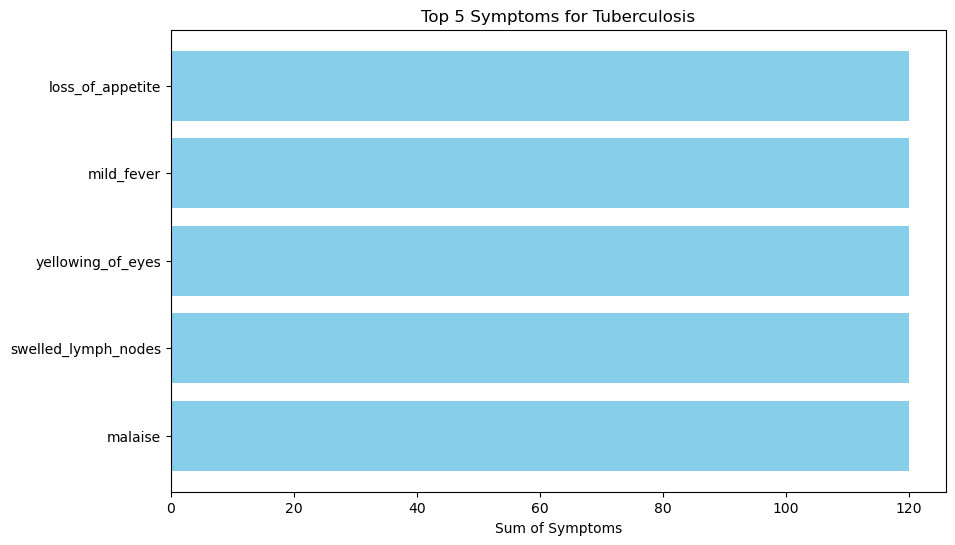

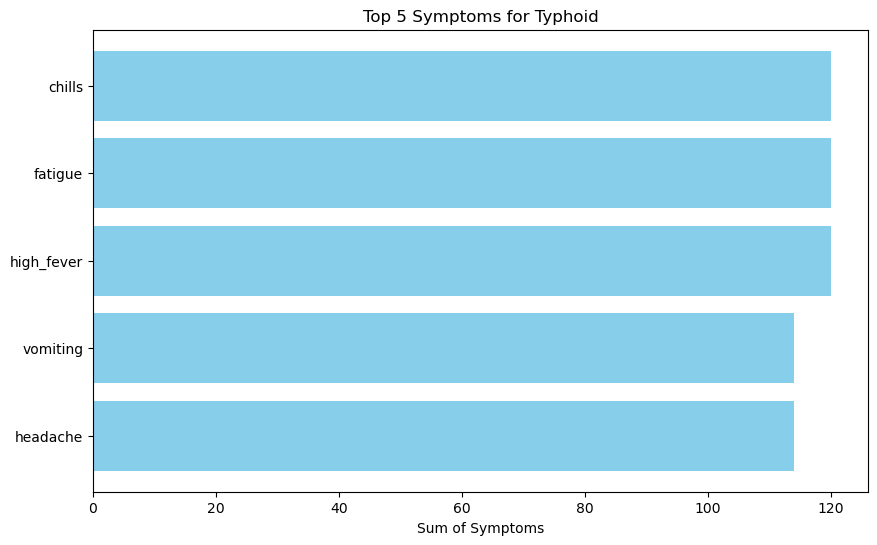

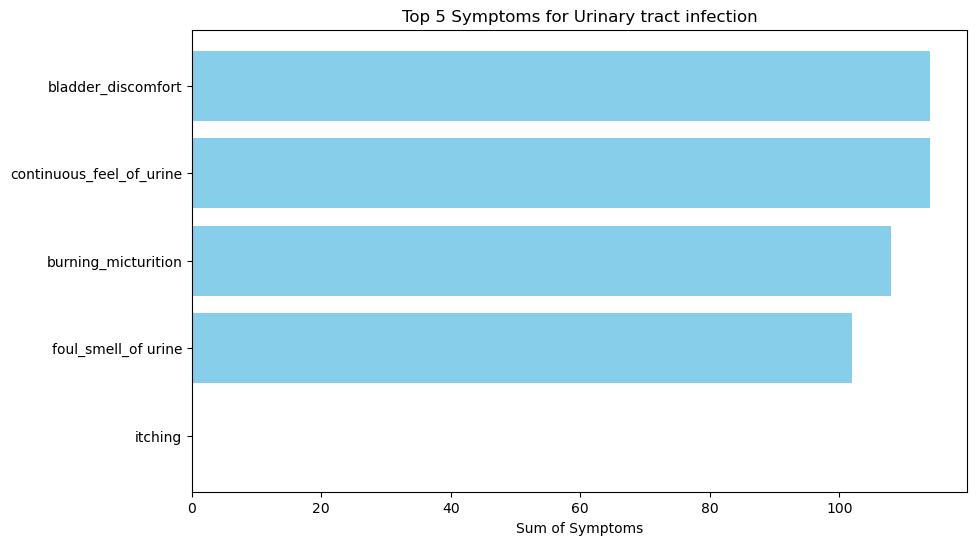

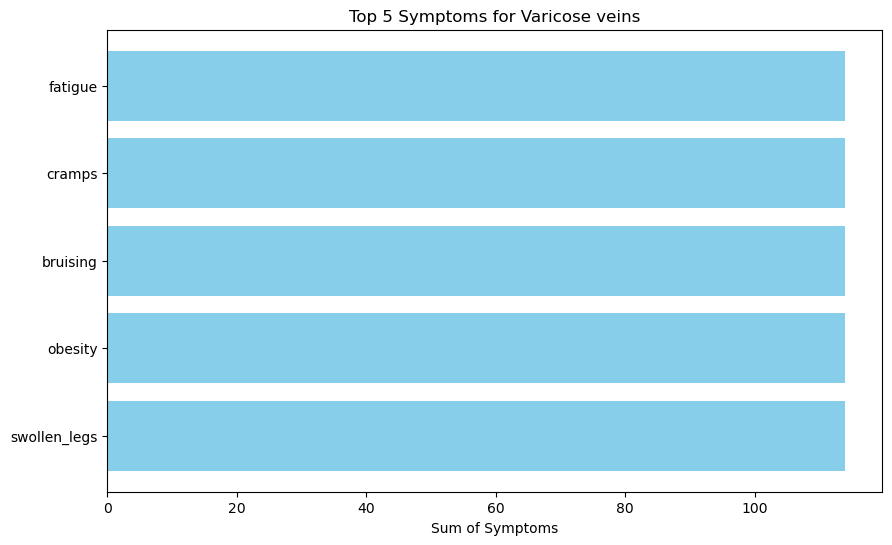

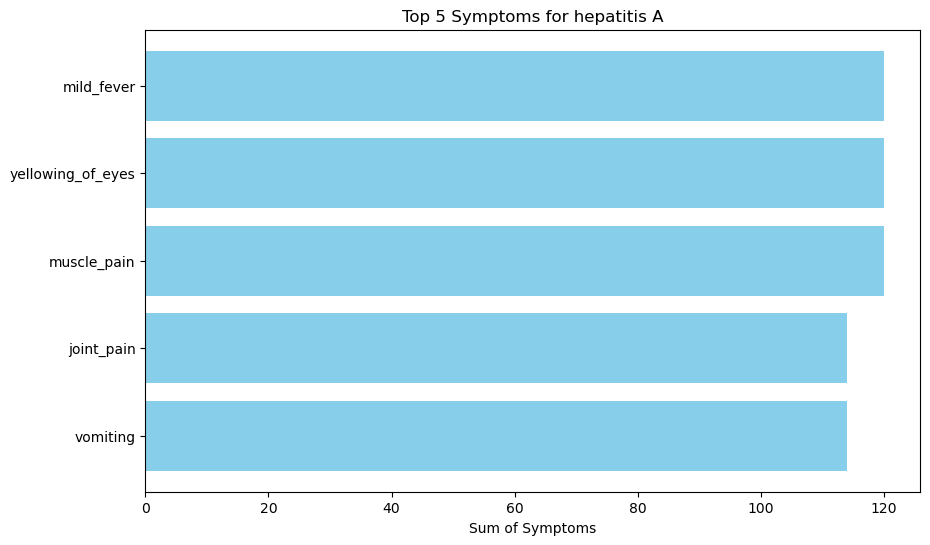

In [28]:
import matplotlib.pyplot as plt

# Loop through each prognosis and its top symptoms
for prognosis, symptoms in top_symptoms_by_prognosis_filtered.items():
    # Get the corresponding values for the top symptoms
    values = sum_by_prognosis_filtered.loc[prognosis, symptoms]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(symptoms, values, color='skyblue')
    plt.xlabel('Sum of Symptoms')
    plt.title(f'Top 5 Symptoms for {prognosis}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()


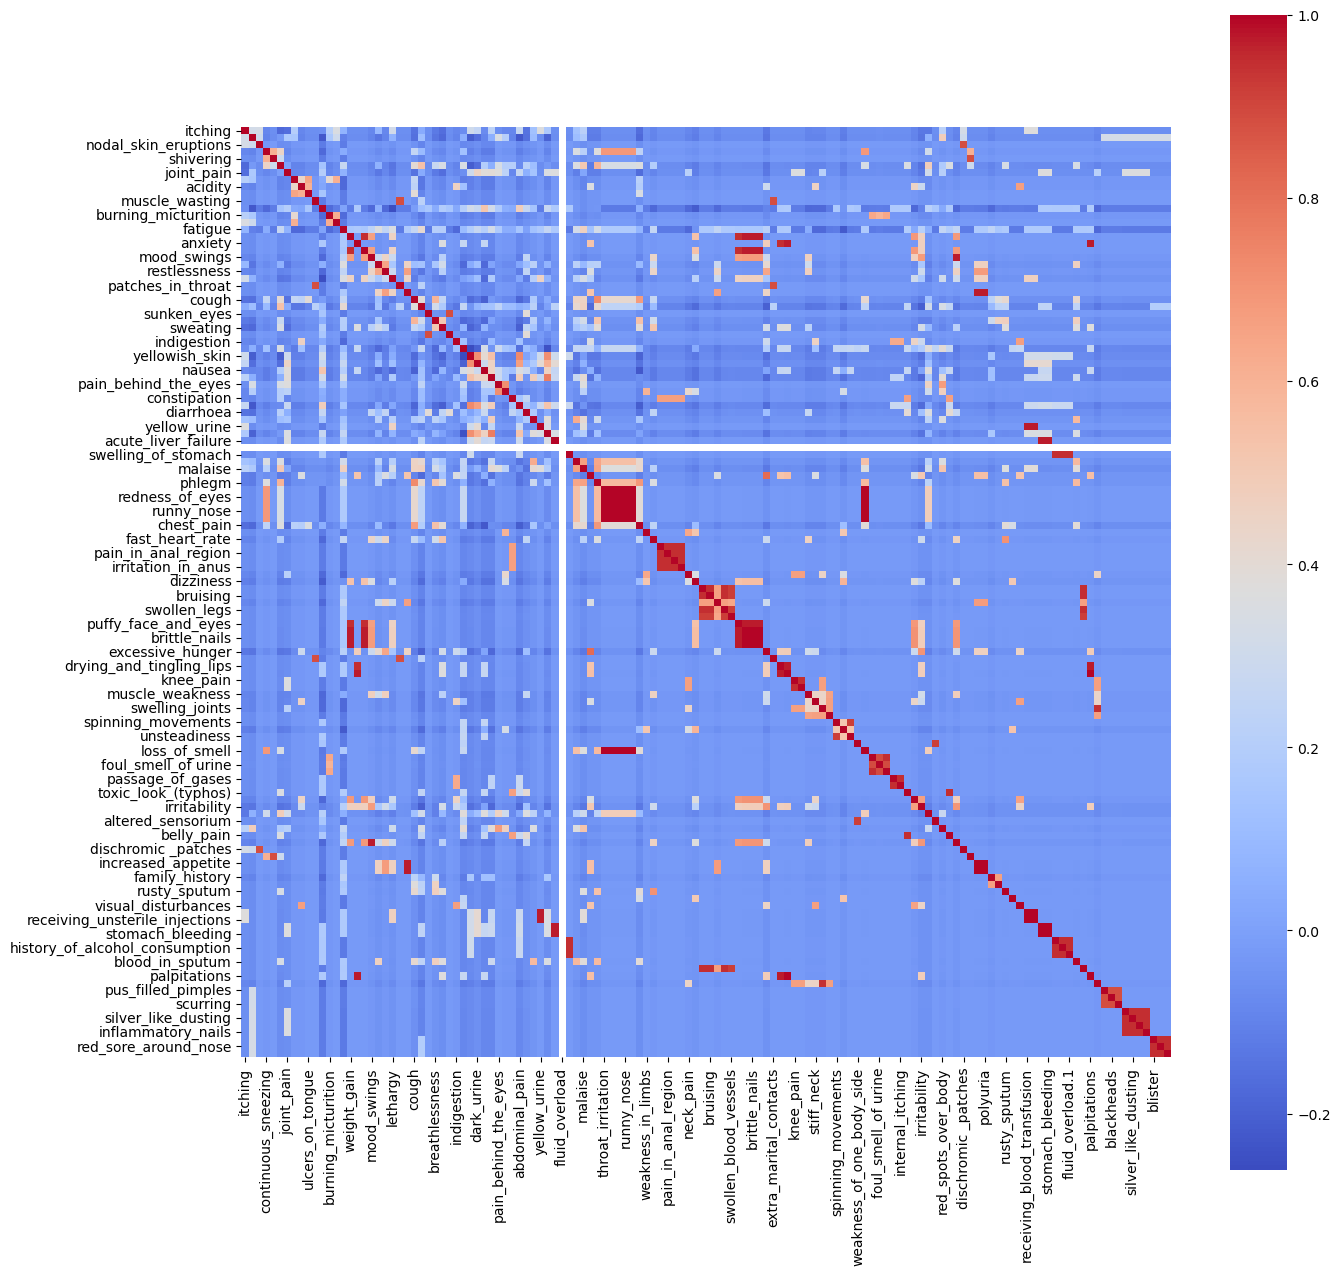

In [9]:
correlation_matrix = data.drop('prognosis', axis = 1).corr()

# Heatmap visualization
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

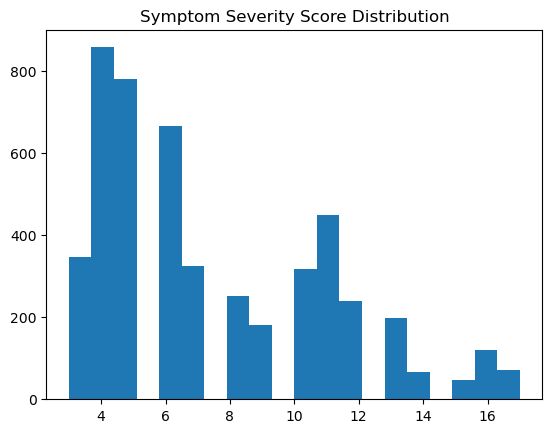

In [17]:
# Example: Creating a new feature - Symptom Severity Score
data['severity_score'] = data.iloc[:, :-1].sum(axis=1)

# Visualize the new feature
plt.hist(data['severity_score'], bins=20)
plt.title('Symptom Severity Score Distribution')
plt.show()


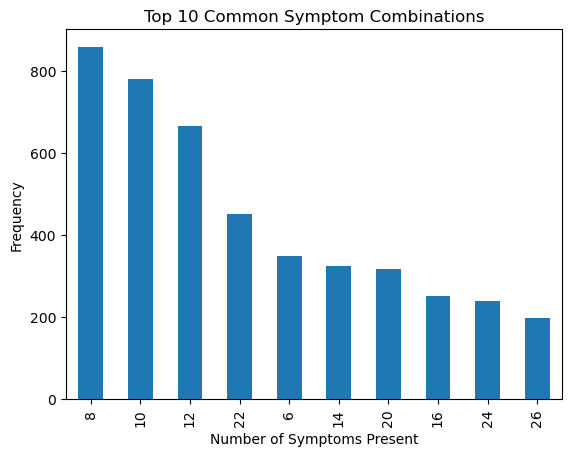

In [18]:
# Most common combinations of symptoms (top 10)
symptom_combinations = data.drop('prognosis', axis=1).sum(axis=1).value_counts().head(10)

symptom_combinations.plot(kind='bar')
plt.title('Top 10 Common Symptom Combinations')
plt.xlabel('Number of Symptoms Present')
plt.ylabel('Frequency')
plt.show()


In [31]:
# Calculating the sum of each symptom across all prognosis (i.e., across all rows)
total_symptoms_sum = data.drop('prognosis', axis=1).sum().sort_values(ascending=False)

# Display the top 10 most commonly occurring symptoms
top_common_symptoms = total_symptoms_sum.head(10)

# Display the results
print(top_common_symptoms)


severity_score       36648
fatigue               1932
vomiting              1914
high_fever            1362
loss_of_appetite      1152
nausea                1146
headache              1134
abdominal_pain        1032
yellowish_skin         912
yellowing_of_eyes      816
dtype: int64


In [32]:
# Calculating the sum of each symptom across all prognosis (i.e., across all rows)
total_symptoms_sum = data.drop('prognosis', axis=1).sum().sort_values(ascending=True)

# Display the top 10 most commonly occurring symptoms
least_common_symptoms = total_symptoms_sum.head(10)

# Display the results
print(least_common_symptoms)


fluid_overload              0
foul_smell_of urine       102
swollen_blood_vessels     108
pus_filled_pimples        108
blackheads                108
extra_marital_contacts    108
dehydration               108
scurring                  108
sunken_eyes               108
spinning_movements        108
dtype: int64


In [33]:
from itertools import combinations

# Function to find common top symptoms between prognoses
def find_similar_prognoses(top_symptoms_dict):
    similar_prognoses = []
    for (prog1, symptoms1), (prog2, symptoms2) in combinations(top_symptoms_dict.items(), 2):
        common_symptoms = set(symptoms1).intersection(symptoms2)
        if len(common_symptoms) > 2:  # If 3 or more symptoms are common, consider them similar
            similar_prognoses.append((prog1, prog2, common_symptoms))
    return similar_prognoses

# Find similar prognoses
similar_prognoses = find_similar_prognoses(top_symptoms_by_prognosis_filtered)

# Display the results
for prog1, prog2, common_symptoms in similar_prognoses:
    print(f"{prog1} and {prog2} share the following top symptoms: {list(common_symptoms)}")


Chronic cholestasis and Hepatitis C share the following top symptoms: ['loss_of_appetite', 'nausea', 'yellowish_skin']
Jaundice and Typhoid share the following top symptoms: ['fatigue', 'vomiting', 'high_fever']
Malaria and Typhoid share the following top symptoms: ['chills', 'vomiting', 'high_fever']


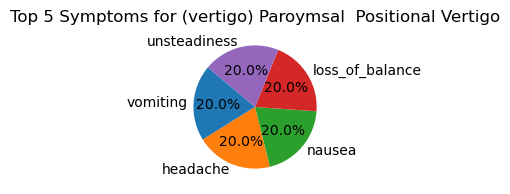

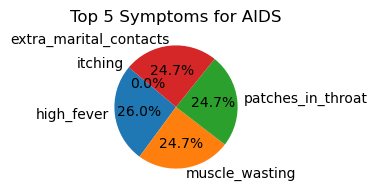

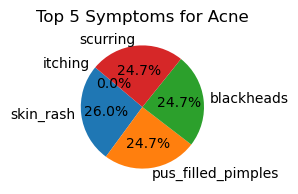

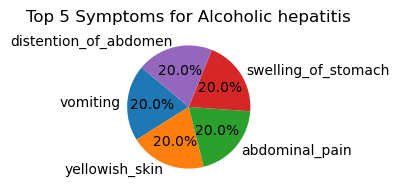

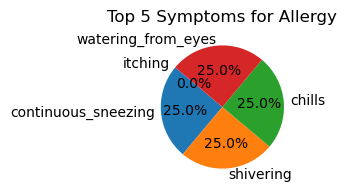

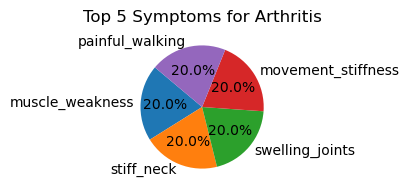

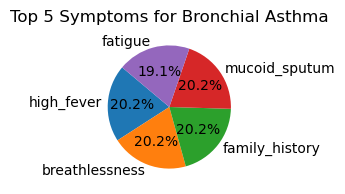

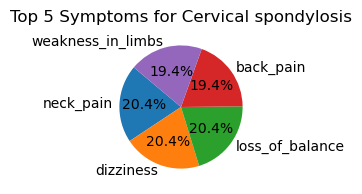

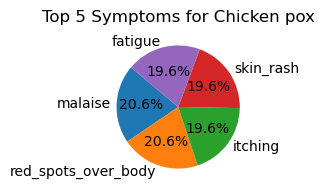

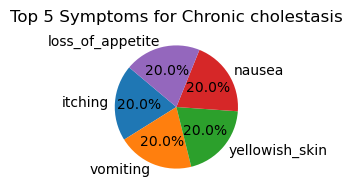

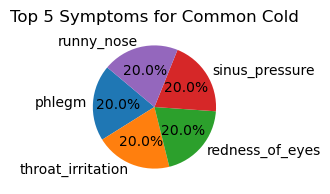

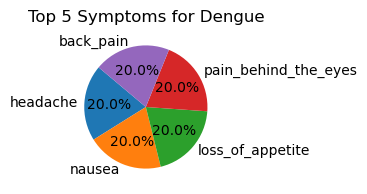

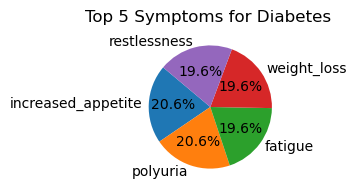

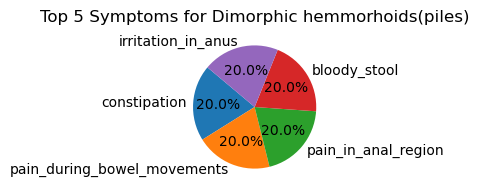

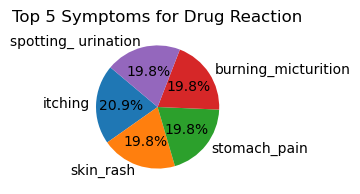

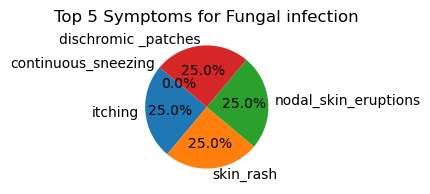

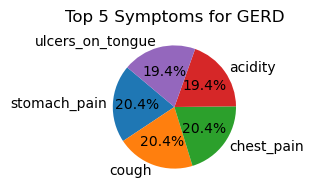

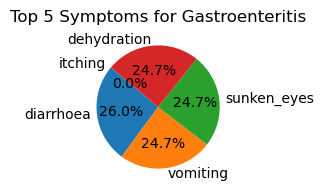

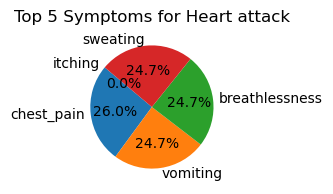

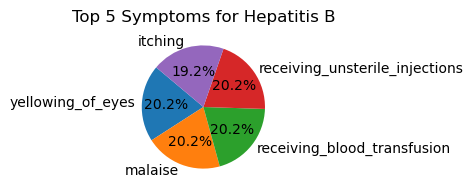

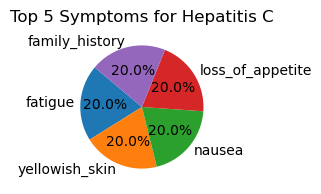

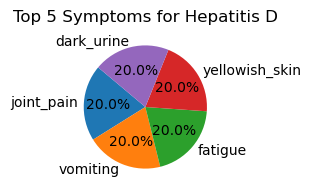

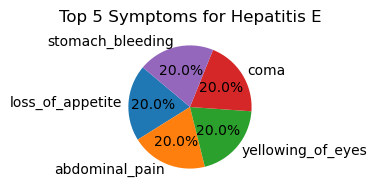

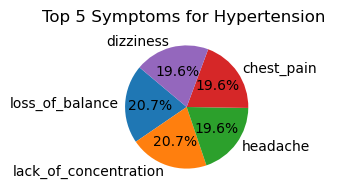

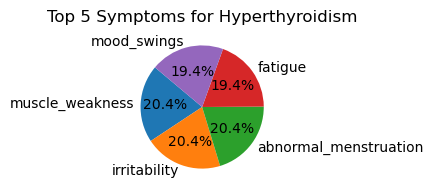

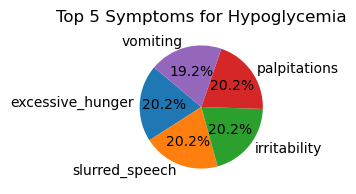

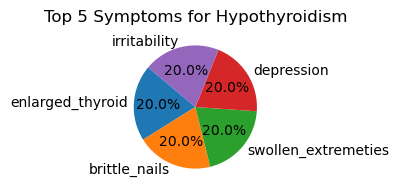

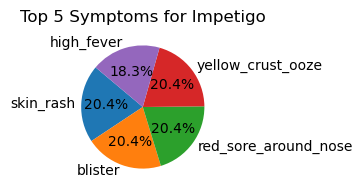

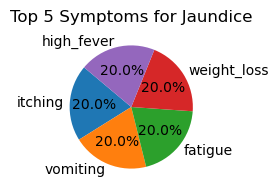

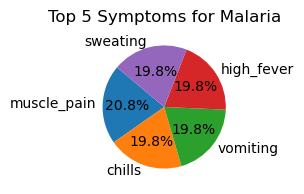

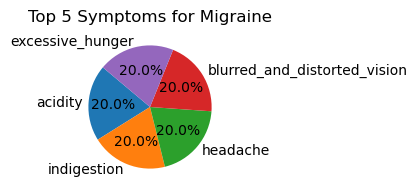

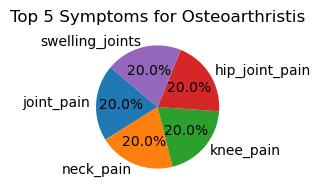

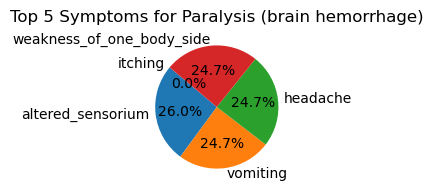

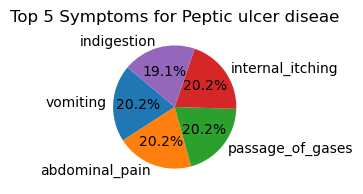

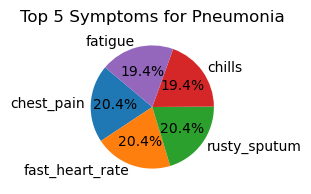

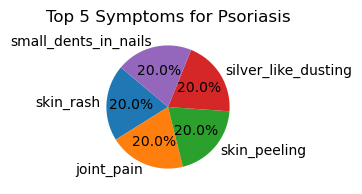

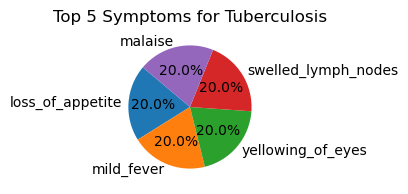

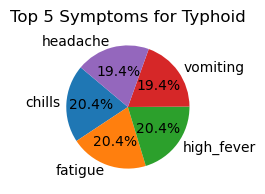

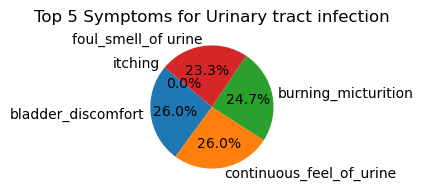

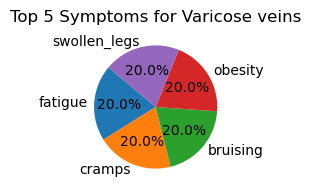

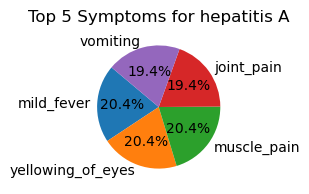

In [36]:
import matplotlib.pyplot as plt

# Plot pie charts for each prognosis and its top symptoms
for prognosis, symptoms in top_symptoms_by_prognosis_filtered.items():
    # Get the counts for the top symptoms
    counts = sum_by_prognosis_filtered.loc[prognosis, symptoms]
    
    # Plot the pie chart
    plt.figure(figsize=(2, 2))
    plt.pie(counts, labels=symptoms, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Symptoms for {prognosis}')
    plt.show()
